In [2]:
import pandas as pd

df = pd.read_csv("C:\\Users\\viven\\Downloads\\wine+quality\\winequality-white.csv", delimiter=';')

# Data Exploration

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())  # Column names, non-null counts, data types

# Show basic statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())  # Summary statistics for numerical columns

# Display the first few rows to preview the data
print("\nFirst Few Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.0

### Check for missing values

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Dropping duplicates if exists

In [5]:
df = df.drop_duplicates()

# Exploring data via visualization

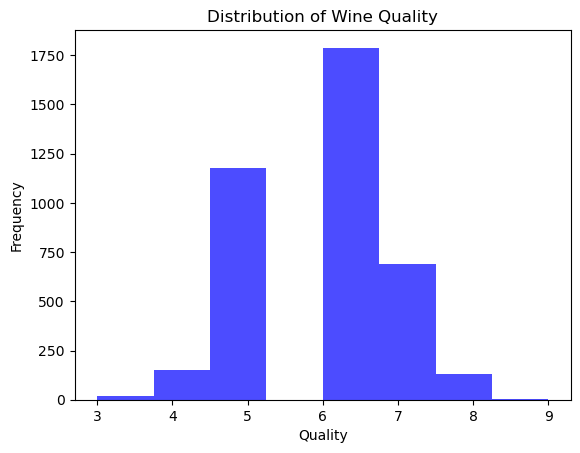

In [6]:
import matplotlib.pyplot as plt

# Distribution of the 'quality' column
plt.hist(df['quality'], bins=8, color='blue', alpha=0.7)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

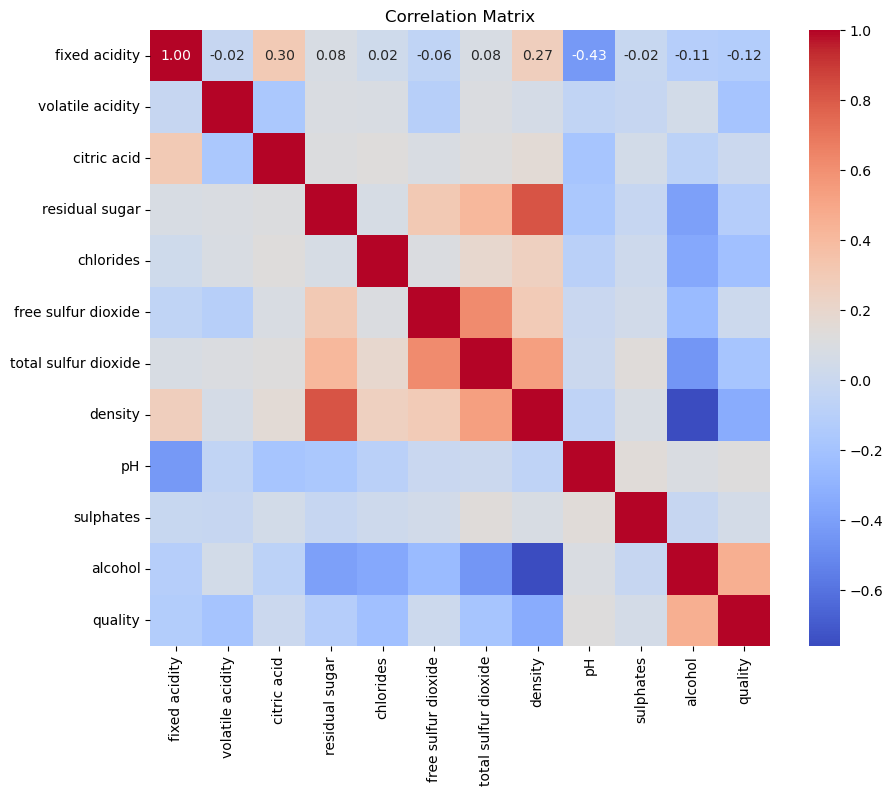

In [7]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Bivariate analysis of data

C:\Users\viven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\viven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\viven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


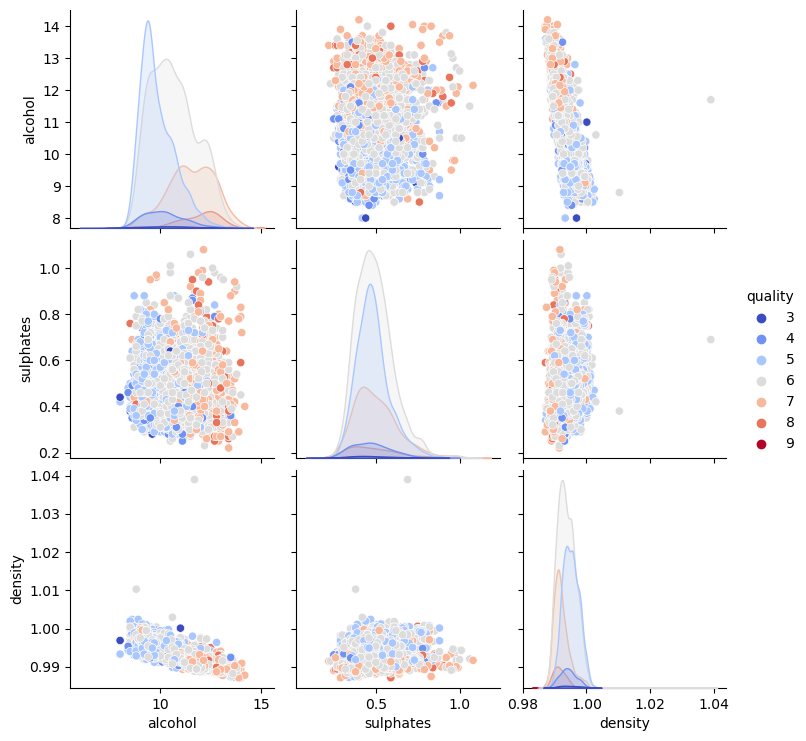

In [8]:
# Pairplot for selected features
selected_features = ['alcohol', 'sulphates', 'density', 'quality']
sns.pairplot(df[selected_features], hue='quality', palette='coolwarm')
plt.show()

## Pairplot Insights

Most of the relationships don't look perfectly linear, hinting at potentially more complex interactions between the variables.

Alcohol vs. Quality:
- Noticeable positive correlation. Higher alcohol content tends to be associated with higher quality wines. The density plots along the diagonal also support this, showing a shift towards higher alcohol content for higher quality ratings.
- Wines with lower alcohol content (around 9-11%) are more likely to be rated lower (3-5), while wines with higher alcohol (around 12-14%) are more likely to be rated higher (6-8).

Sulphates vs. Quality:
- There's a very weak positive correlation between sulphates and quality. The scatterplot shows a slight tendency for higher quality wines to have slightly higher sulphate levels, but the relationship is not as strong as with alcohol.
- There's significant overlap in sulphate levels across different quality ratings. This suggests sulphates alone are not a strong predictor of quality.

Density vs. Quality:
- Negative correlation. Higher density means lower quality wines. This is consistent with the understanding that sweeter wines (often with higher density due to residual sugar) might not always be rated as high quality.
- The wines with the highest quality (8-9) are clustered in the lower density range (around 0.98-1.00).

Alcohol vs. Sulphates:
Weak relationship between alcohol and sulphates. The scatterplot shows a slight tendency for wines with higher alcohol to have slightly higher sulphate levels, but the correlation is not very strong.

Alcohol vs. Density:
A clear negative correlation. Higher alcohol content is associated with lower density.

Sulphates vs. Density:
A weak relationship between sulphates and density.

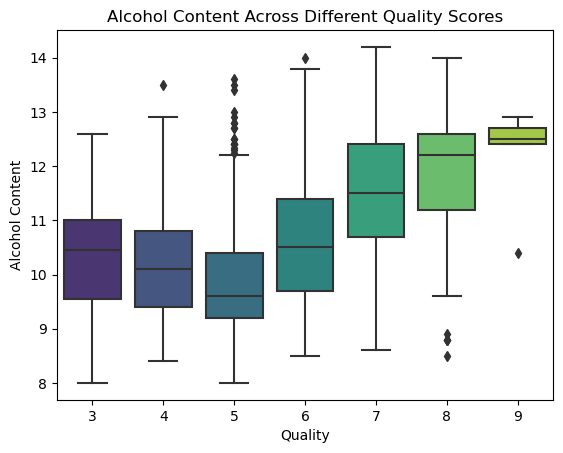

In [9]:
# Boxplot for alcohol content vs. quality
sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis')
plt.title('Alcohol Content Across Different Quality Scores')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

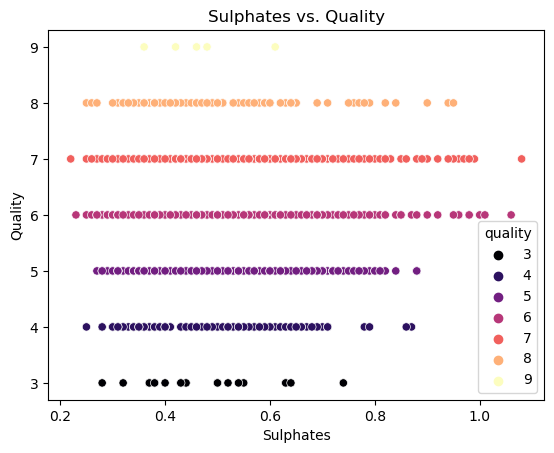

In [10]:
# Scatterplot for sulphates vs. quality
sns.scatterplot(x='sulphates', y='quality', data=df, hue='quality', palette='magma')
plt.title('Sulphates vs. Quality')
plt.xlabel('Sulphates')
plt.ylabel('Quality')
plt.show()

C:\Users\viven\AppData\Local\Temp\ipykernel_24488\281136551.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['density'], shade=True, color='green')
C:\Users\viven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


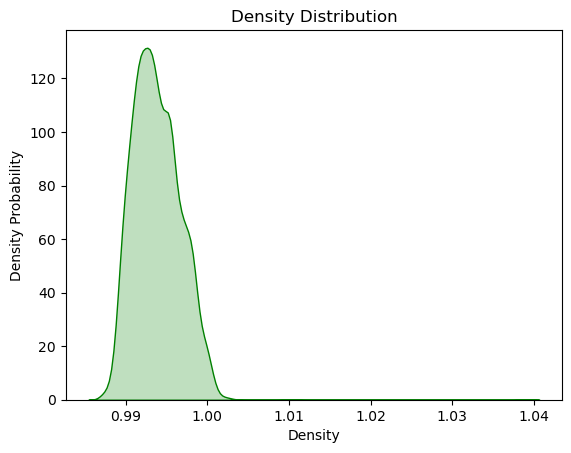

In [11]:
# Density plot for wine density
sns.kdeplot(df['density'], shade=True, color='green')
plt.title('Density Distribution')
plt.xlabel('Density')
plt.ylabel('Density Probability')
plt.show()

# Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['free sulfur dioxide', 'total sulfur dioxide']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
wine_df_scaled = df.copy()
wine_df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the scaled features
print(wine_df_scaled.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             0.587571              0.760754   1.0010  3.00       0.45   
1            -1.213933             -0.120433   0.9940  3.30       0.49   
2            -0.284124             -0.932053   0.9951  3.26       0.44   
3             0.703797              1.131781   0.9956  3.19       0.40   
6            -0.284124             -0.027677   0.9949  3.18       0.47   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

# Hypothesis Testing

### Problem statement / Hypothesis: Is there a significant difference in alcohol levels between high- and low-quality wines?

In [13]:
from scipy.stats import ttest_ind

#Problem statement / Hypothesis: Is there a significant difference in alcohol levels between high- and low-quality wines?

# Grouping data into high and low-quality wines
high_quality = df[df['quality'] >= 7]['alcohol']
low_quality = df[df['quality'] < 7]['alcohol']

# Perform an independent t-test
t_stat, p_value = ttest_ind(high_quality, low_quality)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in alcohol content between high- and low-quality wines.")
else:
    print("No significant difference in alcohol content.")

T-Statistic: 28.83173297380585, P-Value: 4.2757676061964093e-166
There is a significant difference in alcohol content between high- and low-quality wines.


### Problem statement/ Hypothesis: Does the presence of sulpfur dioxide affect the quality? 

In [14]:
from scipy.stats import f_oneway

# Problem statement/ Hypothesis: Does the presence of sulpfur dioxide affect the quality? 

# Group 'free sulfur dioxide' values by wine quality
quality_groups = [group['free sulfur dioxide'].values for _, group in df.groupby('quality')]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*quality_groups)

print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

# Check significance
if p_value < 0.05:
    print("There is a statistically significant effect of free sulfur dioxide on wine quality.")
else:
    print("No statistically significant effect of free sulfur dioxide on wine quality.")


F-Statistic: 17.62851069090716, P-Value: 2.976589513721202e-20
There is a statistically significant effect of free sulfur dioxide on wine quality.


### Problem statement/ Hypothesis: Is the relationship between pH and quality statistically significant?

In [15]:
from scipy.stats import pearsonr

# Problem statement/ Hypothesis: Is the relationship between pH and quality statistically significant?

# Perform Pearson correlation test
correlation, p_value = pearsonr(df['pH'], df['quality'])

# Display the results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The relationship between pH and quality is statistically significant.")
else:
    print("The relationship between pH and quality is not statistically significant.")


Pearson Correlation Coefficient: 0.12382859507261151
P-Value: 5.240854950394443e-15
The relationship between pH and quality is statistically significant.


# Machine Learning

## Feature Encoding

In [16]:
# Create a new feature: sulfur ratio
df['sulfur_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
print(df[['free sulfur dioxide', 'total sulfur dioxide', 'sulfur_ratio']].head())

   free sulfur dioxide  total sulfur dioxide  sulfur_ratio
0                 45.0                 170.0      0.264706
1                 14.0                 132.0      0.106061
2                 30.0                  97.0      0.309278
3                 47.0                 186.0      0.252688
6                 30.0                 136.0      0.220588


In [17]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(['quality'], axis=1)
y = df['quality']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Output the model coefficients
print("Model Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)


Model Coefficients: [ 2.50269010e-02 -1.65985890e+00  2.84094996e-01  5.65429997e-02
 -7.13839099e-01 -1.52276323e-02  4.36727875e-03 -1.02219976e+02
  6.81413691e-01  5.64402093e-01  2.42223770e-01  3.18375172e+00]
Intercept: 101.43379603177127


In [19]:
# Predict on the test set
y_pred = linear_model.predict(X_test)

# Display the first few predictions
print("First Few Predictions:", y_pred[:5])


First Few Predictions: [6.44661517 5.41888627 5.38266129 5.62644981 6.2516568 ]


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 0.5780688159637193
Root Mean Squared Error: 0.7603083689949225
R-Squared: 0.2951471356469805


The RMSE of 0.76 suggests the average error in predicting wine quality is less than 1 point. This seems reasonable, but there is a room for improvement.

R-square of ~0.295, the model explains only 29.5% of the variance in wine quality. This is relatively low, indicating that the current linear regression model might not be capturing the complexities of the data well. We will try other models.

## Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model has been trained successfully!")

Random Forest model has been trained successfully!


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[  0   0   4   1   0   0]
 [  0   4  18   8   0   0]
 [  0   2 139  90   3   0]
 [  0   2  86 237  23   1]
 [  0   0   3  95  45   2]
 [  0   0   1  19   9   1]]


Interpretation
The confusion matrix provides insight into the model's performance for each quality class viz( 3, 4, 5, 6, 7, and 8)

Diagonal Elements: These are correct predictions (e.g., 237 for quality 6).
Off-Diagonal Elements: These are misclassifications (e.g., 90 wines with quality 5 predicted as quality 6).

Key Observations:
The model performs best for quality 6, with 237 correct predictions. This makes sense as quality 6 has the most support (samples).
Lower support classes like 3, 4, and 8 show poor performance with minimal or no correct predictions. This is likely due to the imbalance in class distribution.

In [23]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.13      0.21        30
           5       0.55      0.59      0.57       234
           6       0.53      0.68      0.59       349
           7       0.56      0.31      0.40       145
           8       0.25      0.03      0.06        30

    accuracy                           0.54       793
   macro avg       0.40      0.29      0.31       793
weighted avg       0.53      0.54      0.51       793



C:\Users\viven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\viven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\viven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


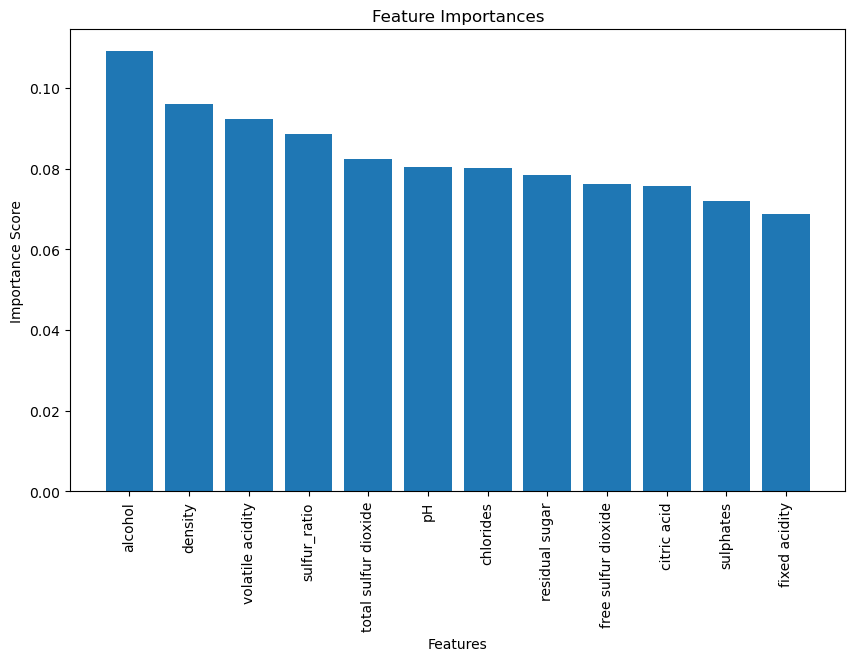

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(features)), features[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


## Comparing models (Linear Regression v Random Forest Classifier)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Evaluate Linear Regression
print("==== Linear Regression ====")
# Predict on the test set (y_pred_lin)
y_pred_lin = linear_model.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

print(f"Mean Absolute Error: {mae_lin}")
print(f"Mean Squared Error: {mse_lin}")
print(f"Root Mean Squared Error: {rmse_lin}")
print(f"R-Squared: {r2_lin}")

# Evaluate Random Forest Classifier
print("\n==== Random Forest Classifier ====")
# Predict on the test set (y_pred_rf)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {acc_rf}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


==== Linear Regression ====
Mean Absolute Error: 0.590889936454319
Mean Squared Error: 0.5780688159637193
Root Mean Squared Error: 0.7603083689949225
R-Squared: 0.2951471356469805

==== Random Forest Classifier ====
Accuracy: 0.5372005044136192

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.13      0.21        30
           5       0.55      0.59      0.57       234
           6       0.53      0.68      0.59       349
           7       0.56      0.31      0.40       145
           8       0.25      0.03      0.06        30

    accuracy                           0.54       793
   macro avg       0.40      0.29      0.31       793
weighted avg       0.53      0.54      0.51       793

Confusion Matrix:
[[  0   0   4   1   0   0]
 [  0   4  18   8   0   0]
 [  0   2 139  90   3   0]
 [  0   2  86 237  23   1]
 [  0   0   3  95  45   2]
 [  0   0   1  19   9   1]]


C:\Users\viven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\viven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\viven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Interpretations

Linear Regression focuses on minimizing errors when treating quality as a continuous variable, so RMSE and R-square will tell us how well it predicts.

Mean Absolute Error (MAE): 0.59
On average, the predicted quality deviates by 0.59 from the actual quality.

Mean Squared Error (MSE): 0.578
The average squared deviation is relatively low, which is good.

Root Mean Squared Error (RMSE): 0.76
Suggests the model's predictions are off by about 0.76 points on average.

R-Squared (R square): 0.295
The model explains only 29.5% of the variance in wine quality, indicating limited predictive power.

Conclusion: Linear regression isn’t highly effective for this dataset, likely because it assumes linear relationships, while most feature relationships (as seen in the pairplot) are non-linear.

Random Forest Classifier focuses on correctly classifying each quality class. The classification report and accuracy will highlight its performance.

Accuracy: 53.7%
The model correctly classified 53.7% of the test data.

Precision, Recall, and F1-Score:
Performance is acceptable for quality 5 (57% F1-score) and quality 6 (59% F1-score), which are the majority classes.
However, the model struggles with underrepresented classes like 3, 4, and 8, where precision and recall are very low.

Confusion Matrix:
Highlights the significant misclassifications between neighboring quality levels (e.g., quality 5 and quality 6).
Poor handling of minority classes such as 3 and 8.

Conclusion: While Random Forest performs better than Linear Regression for classification, it struggles with class imbalance and predictions for minority classes.

Comparison and Recommendation

Linear Regression is better at predicting continuous quality scores. However, its R² of 0.295 indicates it does not capture the complexity of relationships in the data.

Random Forest Classifier is more robust in handling categorical quality predictions. It offers better interpretability with feature importance analysis. However, its accuracy (53.7%) suggests room for improvement through techniques like class balancing or hyperparameter tuning.

Winner: Random Forest Classifier slightly edges out Linear Regression due to its ability to handle the categorical nature of quality. However, additional improvements are necessary.

## Hypertuning Random Forest Classifier

In [28]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define features and target variable
# Removing irrelevant features
X = df.drop(['quality', 'citric acid', 'sulphates', 'fixed acidity'], axis=1)

# Create new features
X['volatile_acidity_alcohol'] = X['volatile acidity'] * X['alcohol']  # Interaction term
X['alcohol_density_ratio'] = X['alcohol'] / X['density']             # Ratio
X['sulfur_dioxide_diff'] = X['total sulfur dioxide'] - X['free sulfur dioxide']  # Difference
X['alcohol_binned'] = pd.cut(X['alcohol'], bins=[0, 10, 12, 15], labels=['low', 'medium', 'high'])  # Binned variable

# Perform one-hot encoding for the categorical variable
X = pd.get_dummies(X, columns=['alcohol_binned'], drop_first=True)  # 'drop_first=True' avoids dummy variable trap

# Dropping original columns because we make use of new features
X = X.drop(['volatile acidity', 'alcohol'], axis=1)

# Define target variable
y = df['quality']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Train the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Final model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate performance
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Set: 0.5233291298865069

Confusion Matrix:
 [[  0   0   3   2   0   0]
 [  0   3  19   8   0   0]
 [  0   1 137  92   4   0]
 [  0   0  89 242  18   0]
 [  0   0   5 106  33   1]
 [  0   0   0  23   7   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.75      0.10      0.18        30
           5       0.54      0.59      0.56       234
           6       0.51      0.69      0.59       349
           7       0.53      0.23      0.32       145
           8       0.00      0.00      0.00        30

    accuracy                           0.52       793
   macro avg       0.39      0.27      0.27       793
weighted avg       0.51      0.52      0.49       793



C:\Users\viven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\viven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\viven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparing Original RF with Hypertuned RF

1. Accuracy
    Original: 0.537 (53.7%)
    Hypertuned: 0.523 (52.3%)
    Accuracy decreased slightly after hypertuning. Although accuracy alone isn’t always a definitive measure, this is a direct indicator.

2. Classification Report (Precision, Recall, F1-score)
The original model had:
    Better overall f1-scores, especially for key classes like 5, 6, and 7.
    Higher weighted average precision (0.53) compared to 0.51 after hypertuning.
    Better handling of class 7 with higher f1-score and recall.
    The hypertuned model slightly improved precision for class 4 but struggled with most other classes, especially class 7. It also failed to make meaningful improvements for minority classes like 3 and 8.

3. Macro Average
    Macro averages give equal weight to all classes, so they’re useful for evaluating imbalanced datasets.
    The original model had a higher macro average for both precision (0.40) and recall (0.29) compared to the hypertuned version (0.39 and 0.27).

4. Confusion Matrix
In both models, minority classes (3 and 8) were poorly predicted. Neither model improved significantly on these rare classes.
The hypertuned model seems to have shifted some predictions, but without consistent gains across other classes.


Conclusion
The original model is marginally better than the hypertuned model, especially in terms of weighted averages and its overall balance across classes. While hypertuning should theoretically improve results, in this case, it may have over-optimized for the hyperparameter space without significantly addressing core issues like class imbalance or feature engineering.

In [31]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy: 0.5357347115543837
